In [1]:
import pandas as pd
from datetime import datetime
import json,os
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']='SimHei'
plt.rcParams['axes.unicode_minus']=False
colors = sns.color_palette() 

In [3]:
df=pd.read_excel('data\patent_invest_2024_先进制造_医疗健康_3.xlsx',index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172418 entries, 0 to 172417
Data columns (total 62 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   公司序号             172418 non-null  int64         
 1   公司简称             172418 non-null  object        
 2   工商全称             171909 non-null  object        
 3   成立时间             172418 non-null  datetime64[ns]
 4   公司简介             172418 non-null  object        
 5   省                172418 non-null  object        
 6   市                172397 non-null  object        
 7   行业               172418 non-null  object        
 8   子行业              172418 non-null  object        
 9   经度               172418 non-null  float64       
 10  纬度               172418 non-null  float64       
 11  估算估值             158944 non-null  float64       
 12  首次上市日期           38304 non-null   datetime64[ns]
 13  目前已上市            172418 non-null  int64         
 14  高科技企业            172418 n

(-1.0999999884300435,
 1.0999997570309128,
 -1.0999999816834682,
 1.0999996154284402)

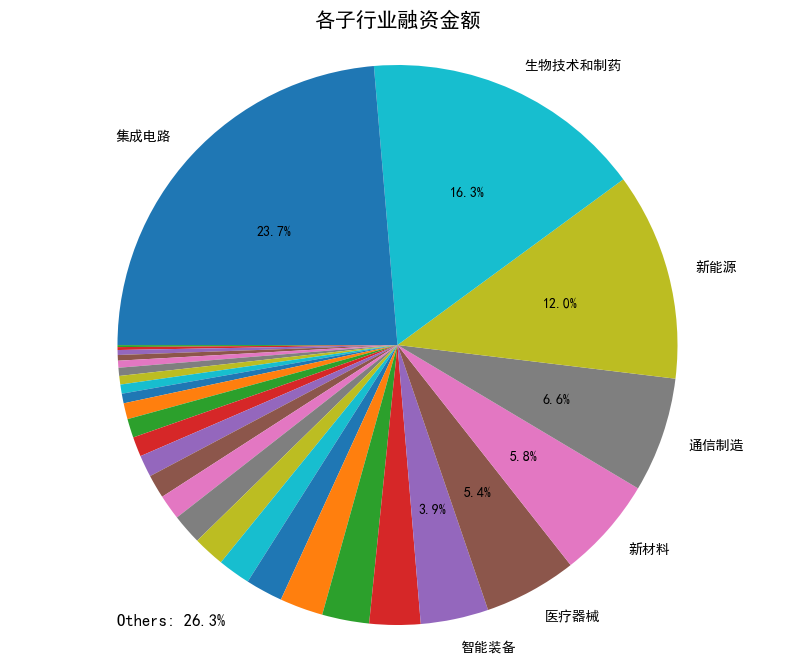

In [4]:
d1=df.groupby('子行业')['等值人民币（万）'].sum().sort_values()
total=d1.values.sum()
labels_filtered = [label if size / total >= 0.03 else '' for label, size in zip(d1.index, d1.values)]
def format_auto_label(pct):
    return '{:.1f}%'.format(pct) if pct >= 3 else '' 

plt.figure(figsize=(10,8))
plt.pie(d1.values, labels=labels_filtered, autopct=format_auto_label,colors=colors, startangle=180)#autopct='%1.1f%%
# 如果有占比小于5%的标签，添加额外的标签显示其总和

small_sizes_sum = sum([size for size in d1.values if size / total < 0.03])
if small_sizes_sum > 0:
    plt.text(-1, -1, f"Others: {small_sizes_sum / total * 100:.1f}%", fontsize=12)

plt.title('各子行业融资金额', va='bottom', fontsize=15)
plt.axis('equal')

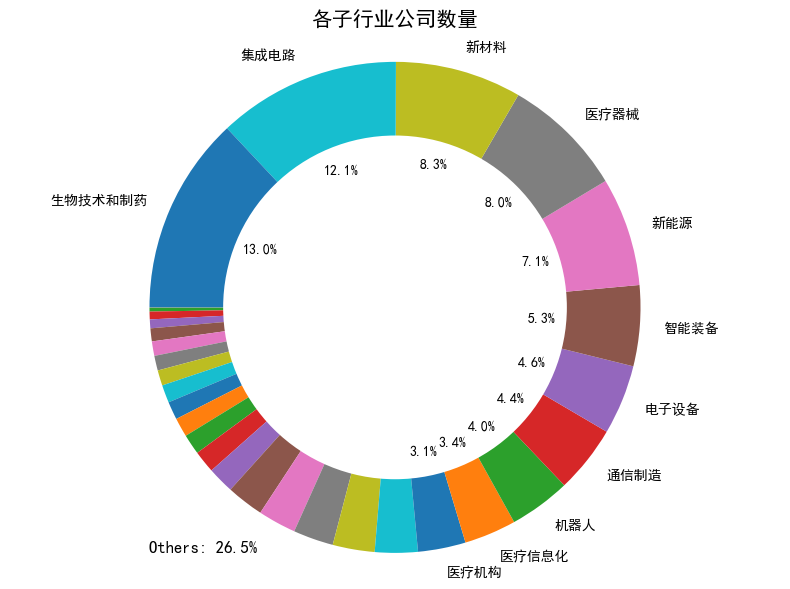

In [5]:
d2=df.groupby('子行业').公司序号.nunique().sort_values()#[df_1.行业.isin(['先进制造', '医疗健康'])]
total=d2.values.sum()

labels_filtered = [label if size / total >= 0.03 else '' for label, size in d2.items()]
format_auto_label=lambda pct:'{:.1f}%'.format(pct) if pct >= 3 else '' 
colors = sns.color_palette() 

plt.figure(figsize=(8,6))
plt.pie(d2.values, labels=labels_filtered, autopct=format_auto_label,colors=colors, startangle=180)#autopct='%1.1f%%
# 如果有占比小于5%的标签，添加额外的标签显示其总和

# 添加中心圆形，创建环形效果
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

small_sizes_sum = sum([size for size in d2.values if size / total < 0.03])
if small_sizes_sum > 0:
    plt.text(-1, -1, f"Others: {small_sizes_sum / total * 100:.1f}%", fontsize=12)

plt.title('各子行业公司数量', va='bottom', fontsize=15)

plt.axis('equal')  # 使饼图呈圆形
plt.tight_layout()

(-1.0999999995290868,
 1.0999999901108226,
 -1.0999999504492517,
 1.0999989594672652)

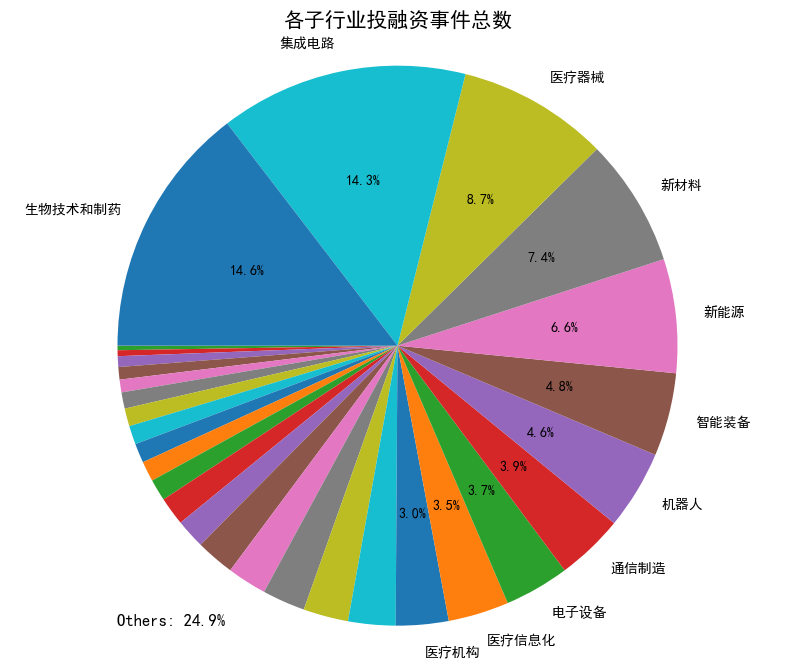

In [6]:
d3=df.groupby('子行业')['融资时间'].count().sort_values()
total=d3.values.sum()
labels_filtered = [label if size / total >= 0.03 else '' for label, size in zip(d3.index, d3.values)]
def format_auto_label(pct):
    return '{:.1f}%'.format(pct) if pct >= 3 else '' 

plt.figure(figsize=(10,8))
plt.pie(d3.values, labels=labels_filtered, autopct=format_auto_label,colors=colors, startangle=180)#autopct='%1.1f%%
# 如果有占比小于5%的标签，添加额外的标签显示其总和

small_sizes_sum = sum([size for size in d3.values if size / total < 0.03])
if small_sizes_sum > 0:
    plt.text(-1, -1, f"Others: {small_sizes_sum / total * 100:.1f}%", fontsize=12)

plt.title('各子行业投融资事件总数', va='bottom', fontsize=15)
plt.axis('equal')

D:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, '各子行业的融资规模')]

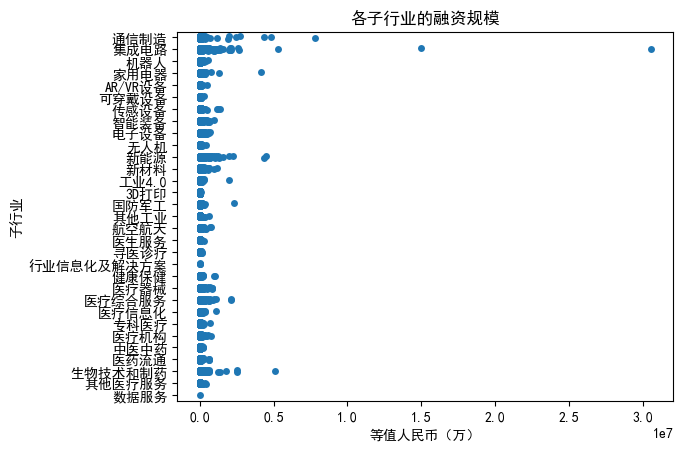

In [32]:
sns.stripplot(data=df,y='子行业', x='等值人民币（万）').set(title='各子行业的融资规模')

Text(0.5, 0, '等值人民币（万,对数尺度）')

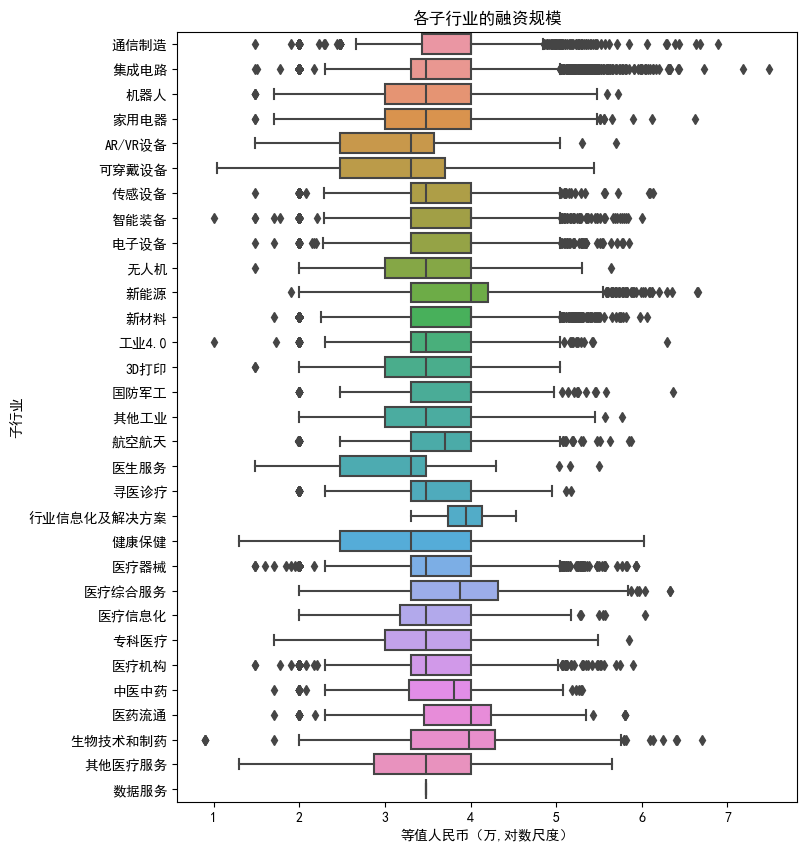

In [43]:
plt.figure(figsize=(8,10))
sns.boxplot(data=df,y='子行业', x=np.log10(df['等值人民币（万）'])).set(title='各子行业的融资规模')
plt.xlabel('等值人民币（万,对数尺度）')

<Axes: title={'center': '每个子行业的平均融资次数'}, ylabel='子行业'>

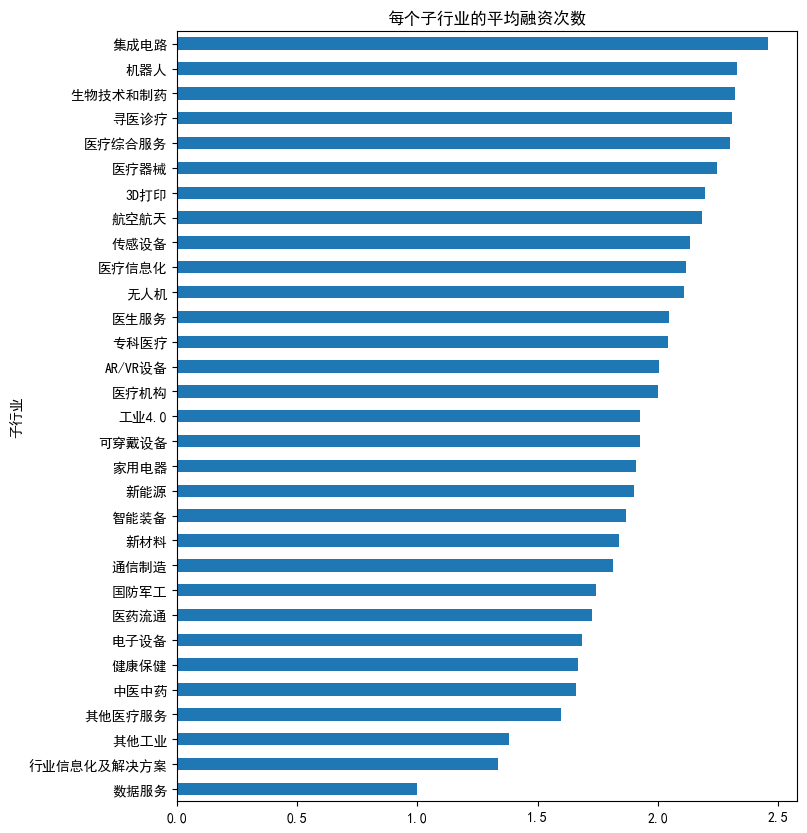

In [8]:
d4=df.groupby(['子行业','公司序号'],as_index= False).融资时间.count()
d4.groupby('子行业').融资时间.mean().rename('平均融资次数').sort_values().plot.barh(title='每个子行业的平均融资次数',figsize=(8,10))#ascending=False

In [9]:
df.groupby(['子行业']).轮次.value_counts()

子行业   轮次     
3D打印  A轮         50
      天使轮        50
      B轮         22
      Pre-A轮     16
      战略投资       15
                 ..
集成电路  Pre-IPO    21
      E轮         11
      F轮          3
      D+轮         3
      基石轮         1
Name: count, Length: 600, dtype: int64

Text(0.5, 1.0, '各子行业轮次')

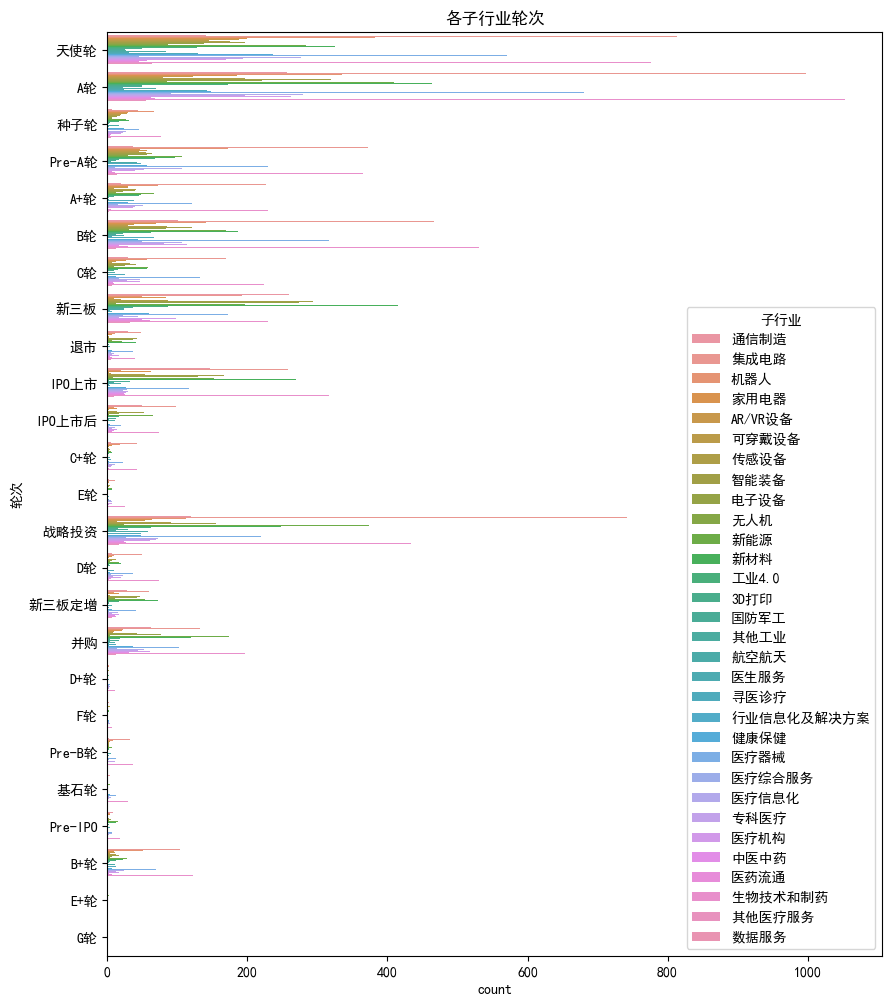

In [10]:
plt.figure(figsize=(10,12))
sns.countplot(data=df,y=df['轮次'],hue='子行业')
plt.title('各子行业轮次')


Text(0.5, 1.0, '各子行业前三轮次')

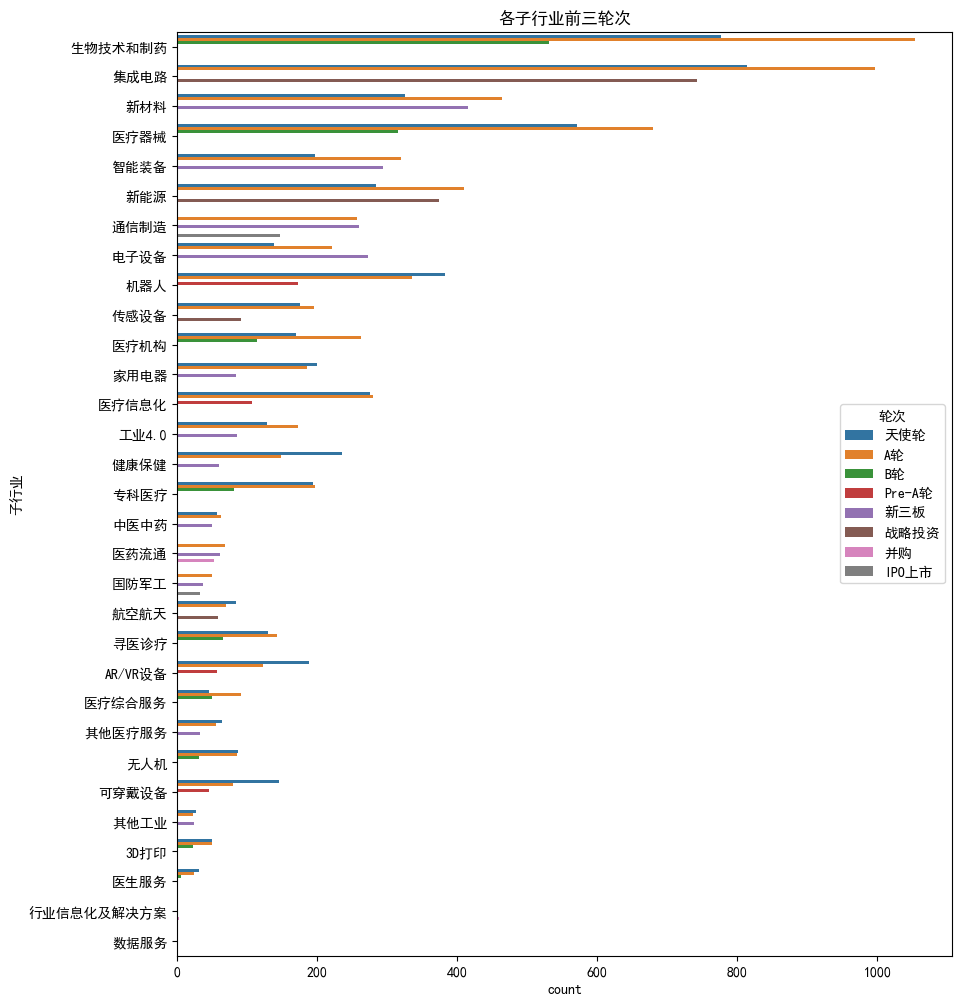

In [11]:
tmp=df.groupby(['子行业']).apply(lambda x:x.轮次.value_counts()[:3]).reset_index()
plt.figure(figsize=(10,12))
sns.barplot(data=tmp,x='count',y='子行业',hue='轮次',order=df['子行业'].value_counts().index)
plt.title('各子行业前三轮次')

In [12]:
df['融资阶段_初创/商业化'] = df['轮次'].dropna().apply(lambda x: '初创融资阶段' if any(tag in x for tag in ['种子轮','天使轮','Pre-A','A轮','A+轮','Pre-B轮','B轮','B+轮','C轮','D轮'])
else '商业化融资阶段' )

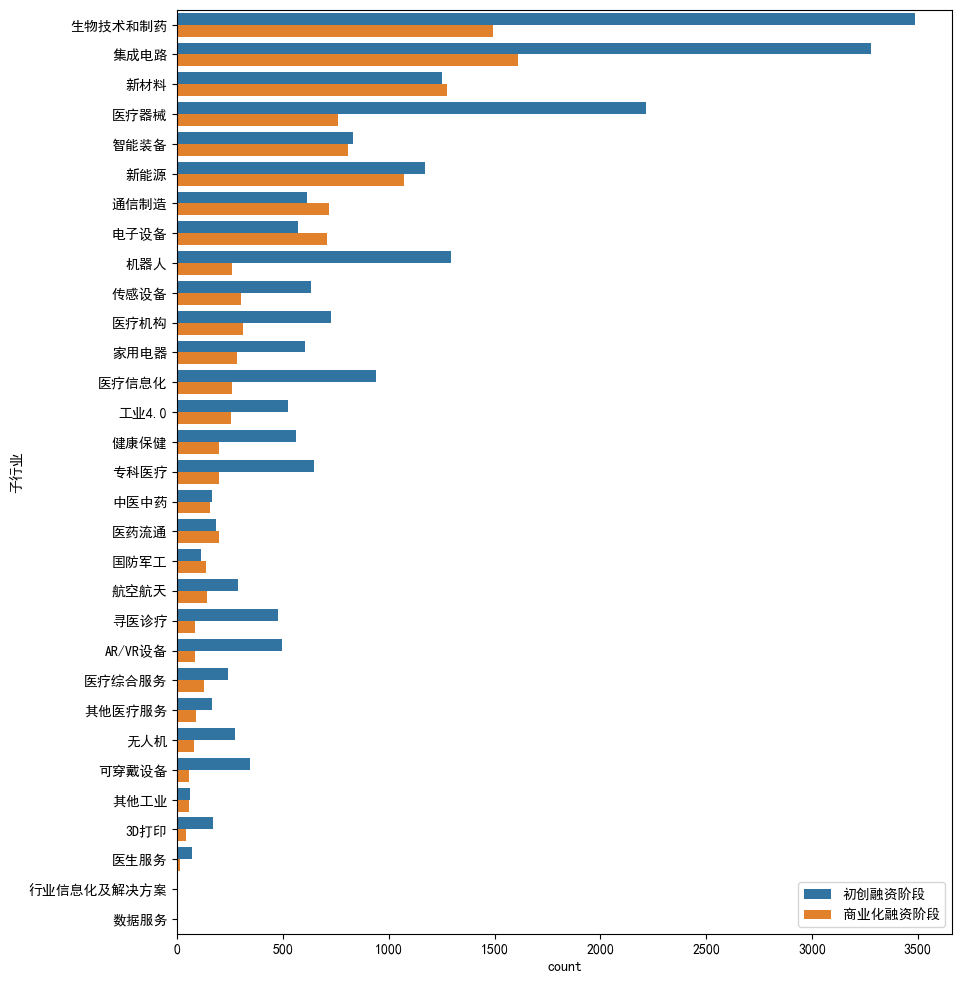

In [13]:
plt.figure(figsize=(10,12))
sns.countplot(data=df,y='子行业',hue='融资阶段_初创/商业化',order=df['子行业'].value_counts().index)#df.groupby(['子行业'])['融资阶段_初创/商业化'].value_counts()
plt.legend(loc='lower right')

In [14]:
df.groupby(['子行业'])['融资阶段_初创/商业化'].value_counts(normalize=True)

子行业         融资阶段_初创/商业化
3D打印        初创融资阶段         0.800948
            商业化融资阶段        0.199052
AR/VR设备     初创融资阶段         0.853195
            商业化融资阶段        0.146805
专科医疗        初创融资阶段         0.764497
                             ...   
行业信息化及解决方案  初创融资阶段         0.250000
通信制造        商业化融资阶段        0.539157
            初创融资阶段         0.460843
集成电路        初创融资阶段         0.670417
            商业化融资阶段        0.329583
Name: proportion, Length: 61, dtype: float64

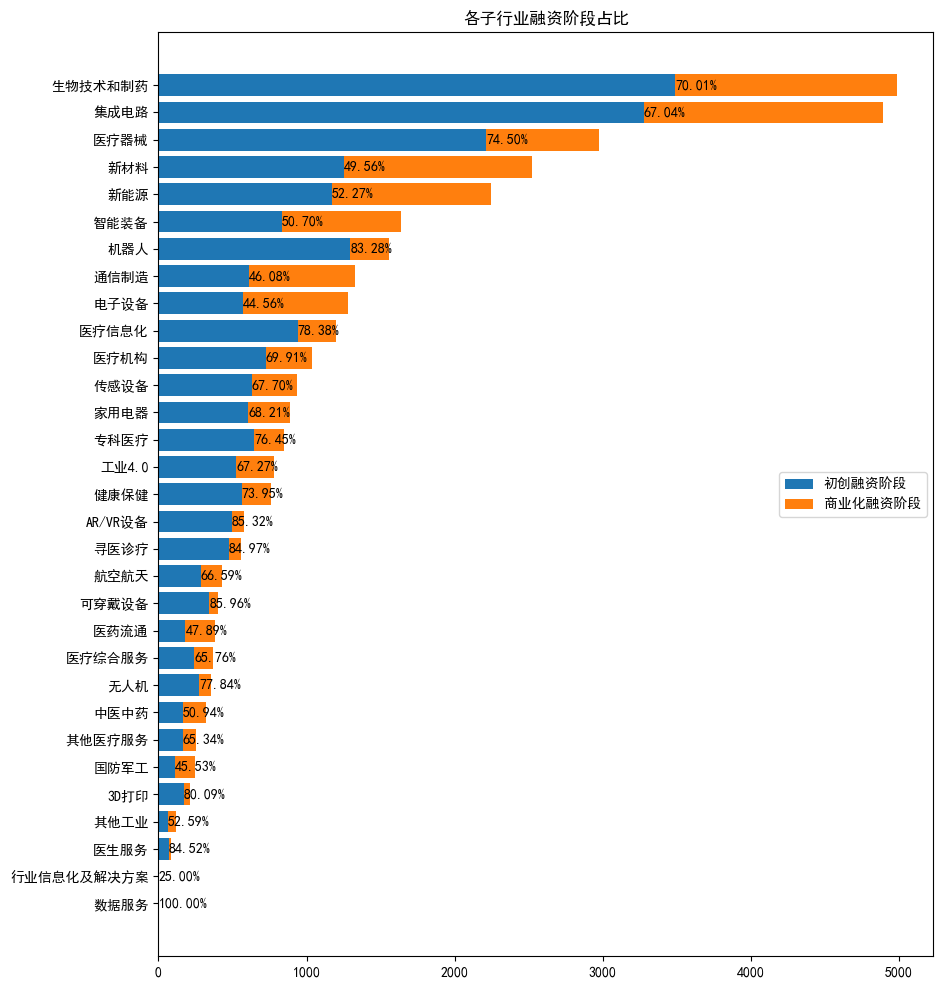

In [15]:
tmp=df.pivot_table(columns='融资阶段_初创/商业化',index='子行业',values='公司序号',aggfunc='count',margins=True).sort_values(by='All')[:-1] #nunique
yb=np.zeros(tmp.shape[0])
plt.figure(figsize=(10,12))
plt.barh(tmp.index,width=tmp['初创融资阶段'],label='初创融资阶段')
yb+=tmp['初创融资阶段']
tmp_1=tmp['初创融资阶段']/tmp['All']
for i, value in enumerate(tmp['初创融资阶段']):
    plt.text(value, i, f'{tmp_1.iloc[i]:.2%}', va='center')
plt.barh(tmp.index,width=tmp['商业化融资阶段'],left=yb,label='商业化融资阶段')#height,bottom
yb+=tmp['商业化融资阶段']
plt.title('各子行业融资阶段占比')
plt.legend()

<Axes: title={'center': '各省份融资金额'}, xlabel='省'>

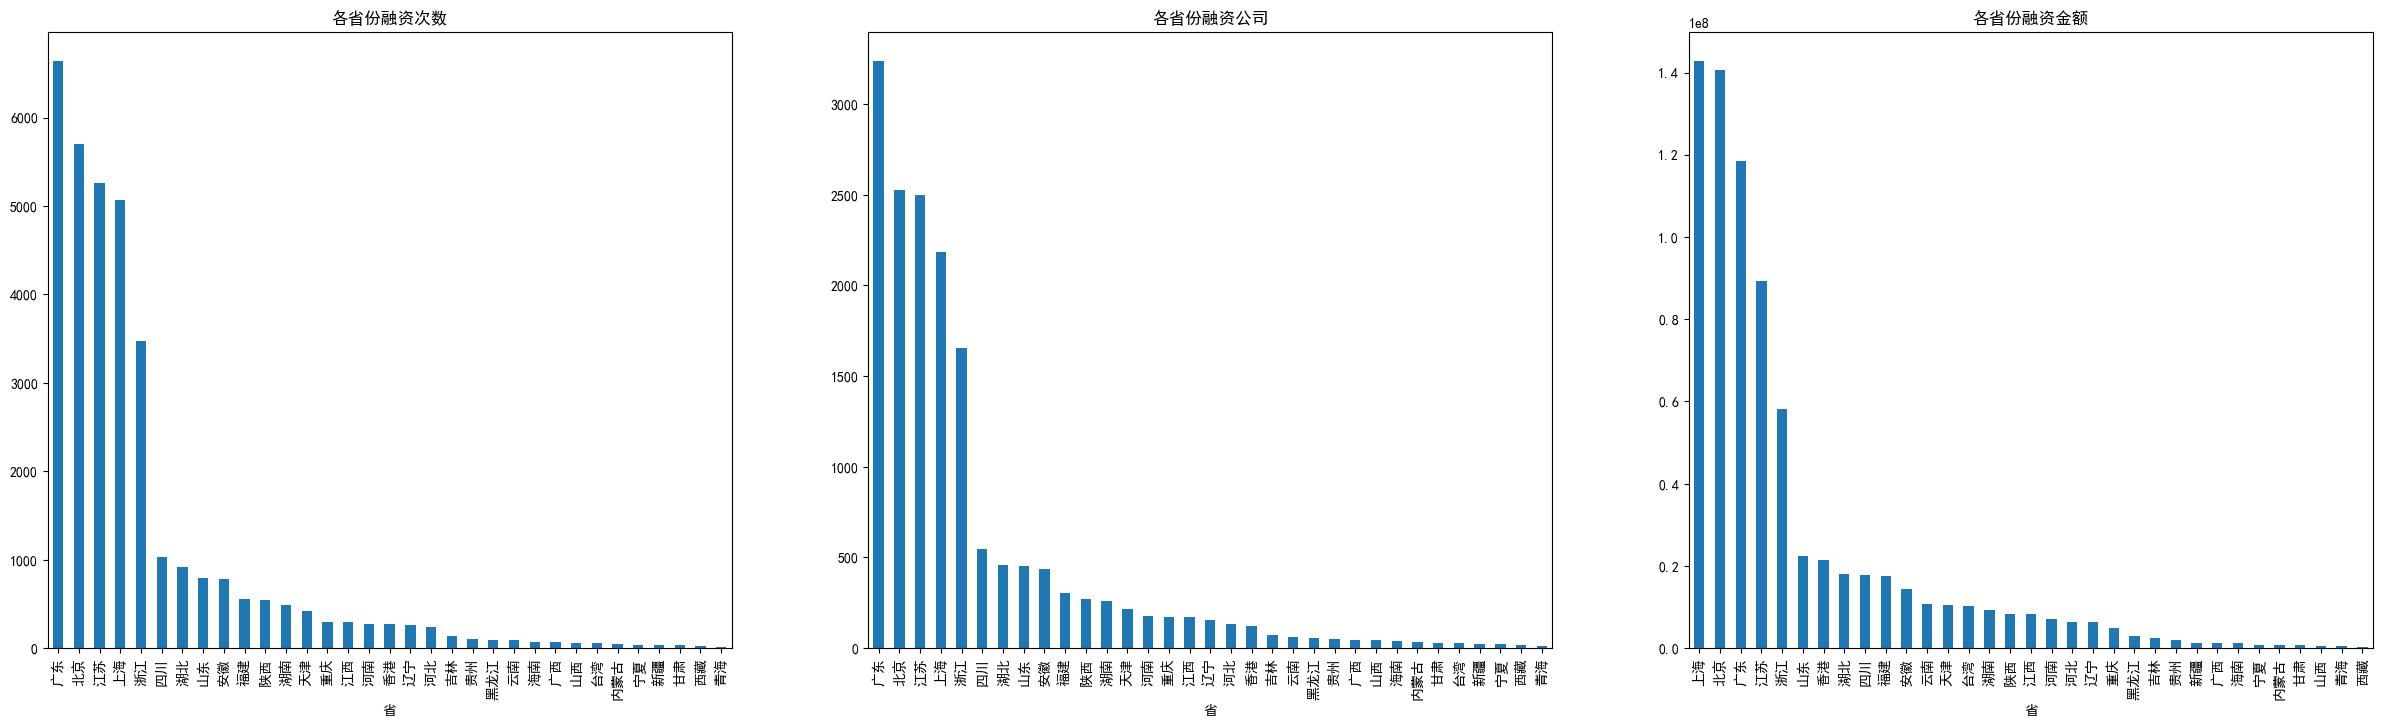

In [16]:
fig=plt.figure(figsize=(30,8))
fig.add_subplot(1,3,1)
df.groupby(['省']).融资时间.count().sort_values(ascending=False).plot.bar(title='各省份融资次数')
fig.add_subplot(1,3,2)
df.groupby(['省']).公司序号.nunique().sort_values(ascending=False).plot.bar(title='各省份融资公司')
fig.add_subplot(1,3,3)
df.groupby(['省'])['等值人民币（万）'].sum().sort_values(ascending=False).plot.bar(title='各省份融资金额')

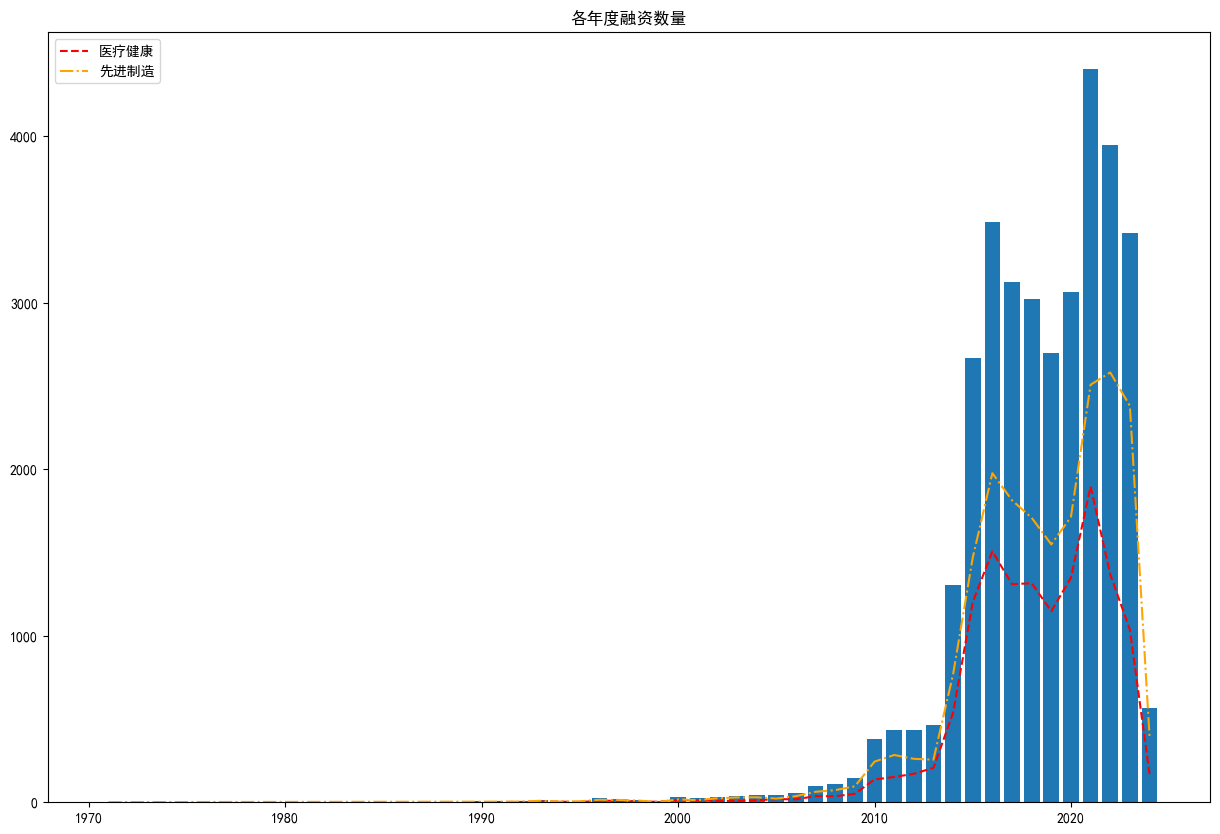

In [17]:
d5=df.groupby(['融资年份']).融资时间.count()
plt.figure(figsize=(15,10))
plt.bar(d5.index,d5.values)
plt.plot(df.query("行业=='医疗健康'").groupby(['融资年份']).融资时间.count(),linestyle='--',color='red',label='医疗健康')
plt.plot(df.query("行业=='先进制造'").groupby(['融资年份']).融资时间.count(),linestyle='-.',color='orange',label='先进制造')
plt.title('各年度融资数量')
plt.legend()
#plt.grid(True)

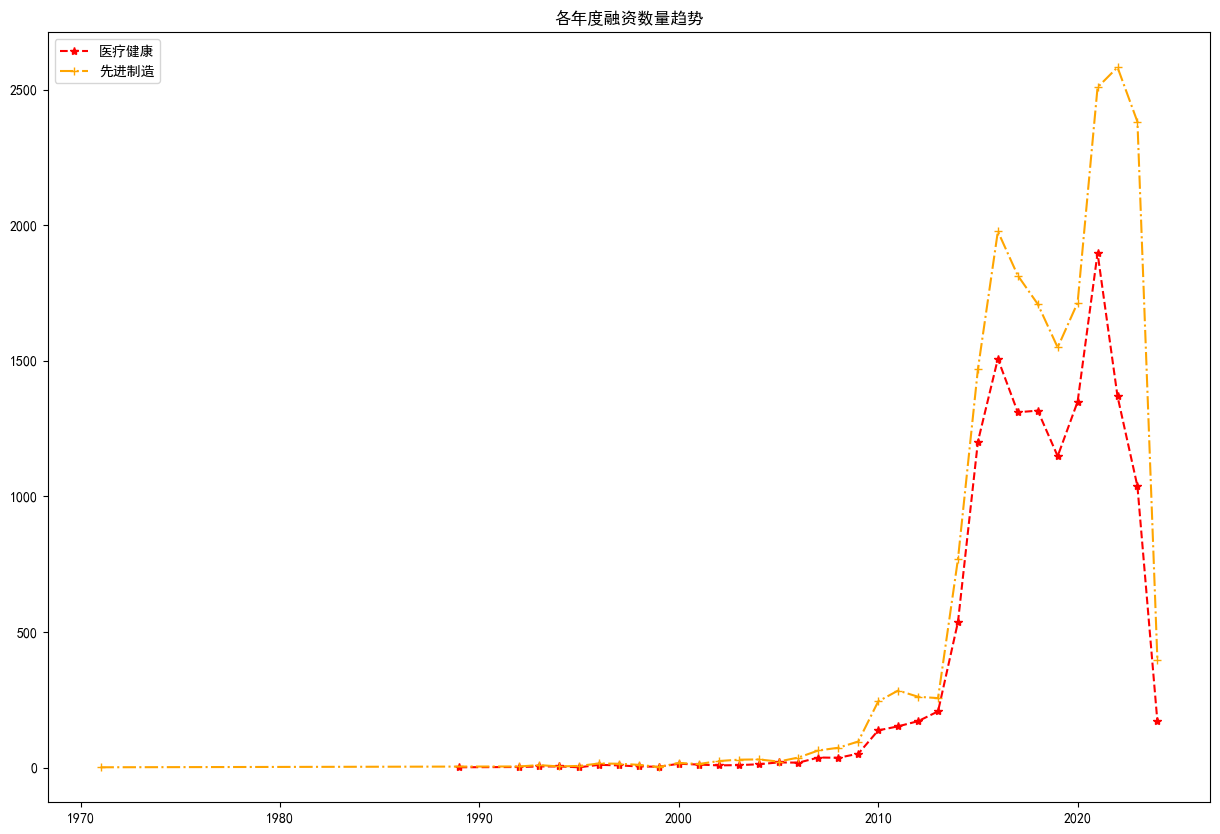

In [18]:
d6=df.groupby(['行业', '融资年份']).size().reset_index(name='融资事件数量')
mask=(d6.行业=='医疗健康')
plt.figure(figsize=(15,10))
plt.plot(d6.loc[mask,'融资年份'],d6.loc[mask,'融资事件数量'],linestyle='--',marker='*',color='red',label='医疗健康')
plt.plot(d6.loc[~mask,'融资年份'],d6.loc[~mask,'融资事件数量'],linestyle='-.',marker='+',color='orange',label='先进制造')
plt.title('各年度融资数量趋势')
plt.legend()

In [19]:
df.query("行业=='医疗健康'")['Application_num'].sum(),df.query("行业=='先进制造'")['Application_num'].sum()#(融资时间_last<='申请日'<融资时间)['申请号'].nunique()，观察年统计周期没去重,观察年->专利申请年,非融资年,当前期年度没融资是累计的

(661359.0, 4115308.0)

In [20]:
#df.drop_duplicates('投资时间_Shift',keep='last')
mask=df.groupby('公司序号',group_keys=False)['投资时间_Shift'].apply(lambda x:x.duplicated(keep='last'))
df_1=df[~mask]
df_1[['公司简称','观察年','投资时间_Shift','Application_num']]

,公司简称,观察年,投资时间_Shift,Application_num
2,WiPlug推,2013,NaT,NaN
3,WiPlug推,2014,2013-03-01,NaN
5,21克手机,2012,NaT,NaN
7,21克手机,2014,2012-04-04,13.0
9,21克手机,2016,2014-06-05,4.0
...,...,...,...,...
172398,康迪医药,2024,NaT,NaN
172405,光声制药,2024,NaT,8.0
172410,太希智能,2024,NaT,25.0
172412,途深智合,2024,NaT,3.0


In [21]:
#df.groupby(['行业', '子行业']).size().reset_index(name='条数')
df_1.groupby(['行业', '子行业'])['Application_num'].sum().reset_index(name='专利个数')

,行业,子行业,专利个数
0,先进制造,3D打印,6035.0
1,先进制造,AR/VR设备,6586.0
2,先进制造,传感设备,23028.0
3,先进制造,其他工业,3100.0
4,先进制造,可穿戴设备,7997.0
5,先进制造,国防军工,15473.0
6,先进制造,家用电器,286260.0
7,先进制造,工业4.0,30156.0
8,先进制造,新材料,79936.0
9,先进制造,新能源,115815.0


In [22]:
df_1.pivot_table(columns='行业',index='子行业',values='Application_num',aggfunc='sum',margins=True)

行业,先进制造,医疗健康,All
子行业,,,
3D打印,6035.0,NaN,6035.0
AR/VR设备,6586.0,NaN,6586.0
专科医疗,NaN,5634.0,5634.0
中医中药,NaN,6299.0,6299.0
传感设备,23028.0,NaN,23028.0
健康保健,NaN,8671.0,8671.0
其他医疗服务,NaN,4487.0,4487.0
其他工业,3100.0,NaN,3100.0
医生服务,NaN,460.0,460.0


(-1.0999965821474493,
 1.0999998351053095,
 -1.0999999898198112,
 1.099999786735012)

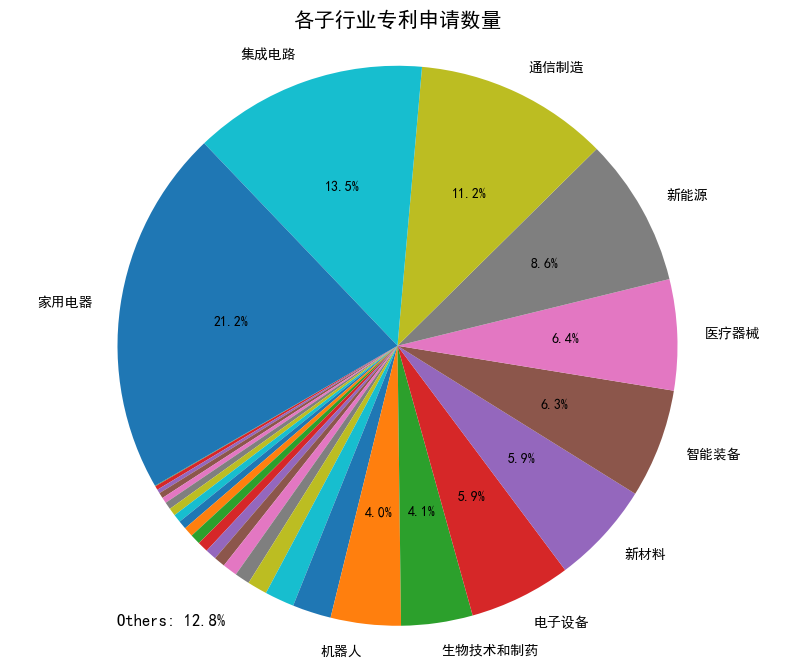

In [23]:
d_71=df_1.groupby('子行业')['Application_num'].sum().sort_values().sort_values()
total=d_71.values.sum()
labels_filtered = [label if size / total >= 0.03 else '' for label, size in zip(d_71.index, d_71.values)]
def format_auto_label(pct):
    return '{:.1f}%'.format(pct) if pct >= 3 else '' 

plt.figure(figsize=(10,8))
plt.pie(d_71.values, labels=labels_filtered, autopct=format_auto_label,colors=colors, startangle=210)#autopct='%1.1f%%
# 如果有占比小于5%的标签，添加额外的标签显示其总和

small_sizes_sum = sum([size for size in d_71.values if size / total < 0.03])
if small_sizes_sum > 0:
    plt.text(-1, -1, f"Others: {small_sizes_sum / total * 100:.1f}%", fontsize=12)

plt.title('各子行业专利申请数量', va='bottom', fontsize=15)
plt.axis('equal')

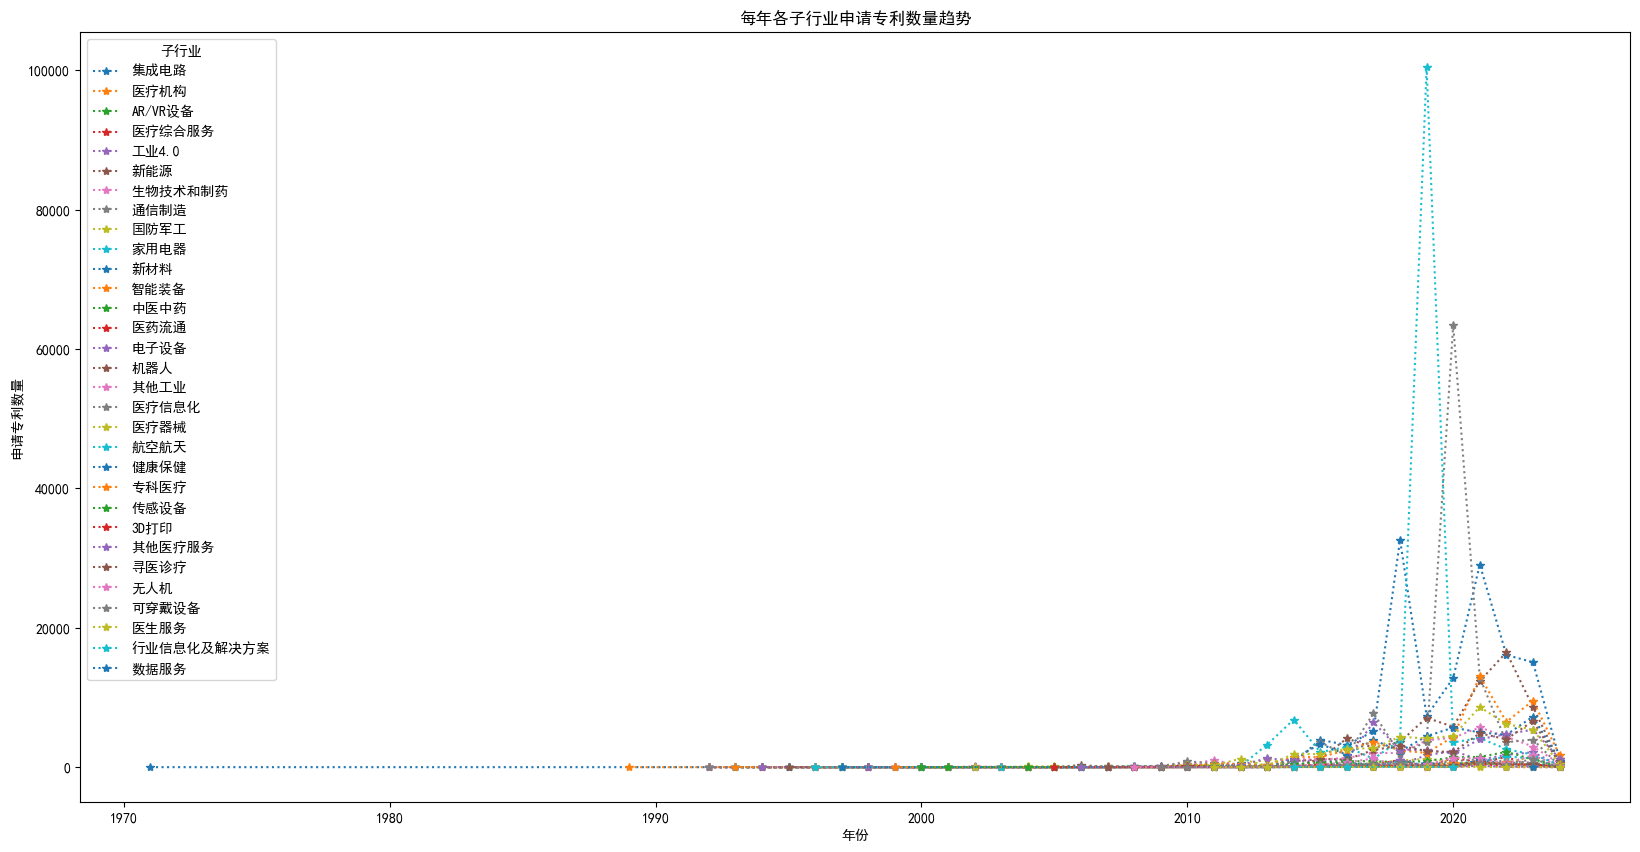

In [24]:
d7=df.groupby(['融资年份','子行业'],as_index=False)['Application_num'].sum()

plt.figure(figsize=(20,10))
# yb=np.zeros(d7['融资年份'].nunique())

for la in d7['子行业'].unique():
    plt.plot(d7.loc[d7.子行业==la,'融资年份'],d7.loc[d7.子行业==la,'Application_num'],linestyle=':',marker='*',label=la)
    # plt.bar(d7.loc[d7.子行业==la,'融资年份'],height=d7.loc[d7.子行业==la,'Application_num'],bottom=yb,label=la)
    # yb+=d7.loc[d7.子行业==la,'Application_num']

plt.title('每年各子行业申请专利数量趋势')
plt.xlabel('年份')
plt.ylabel('申请专利数量')
plt.legend(title='子行业')

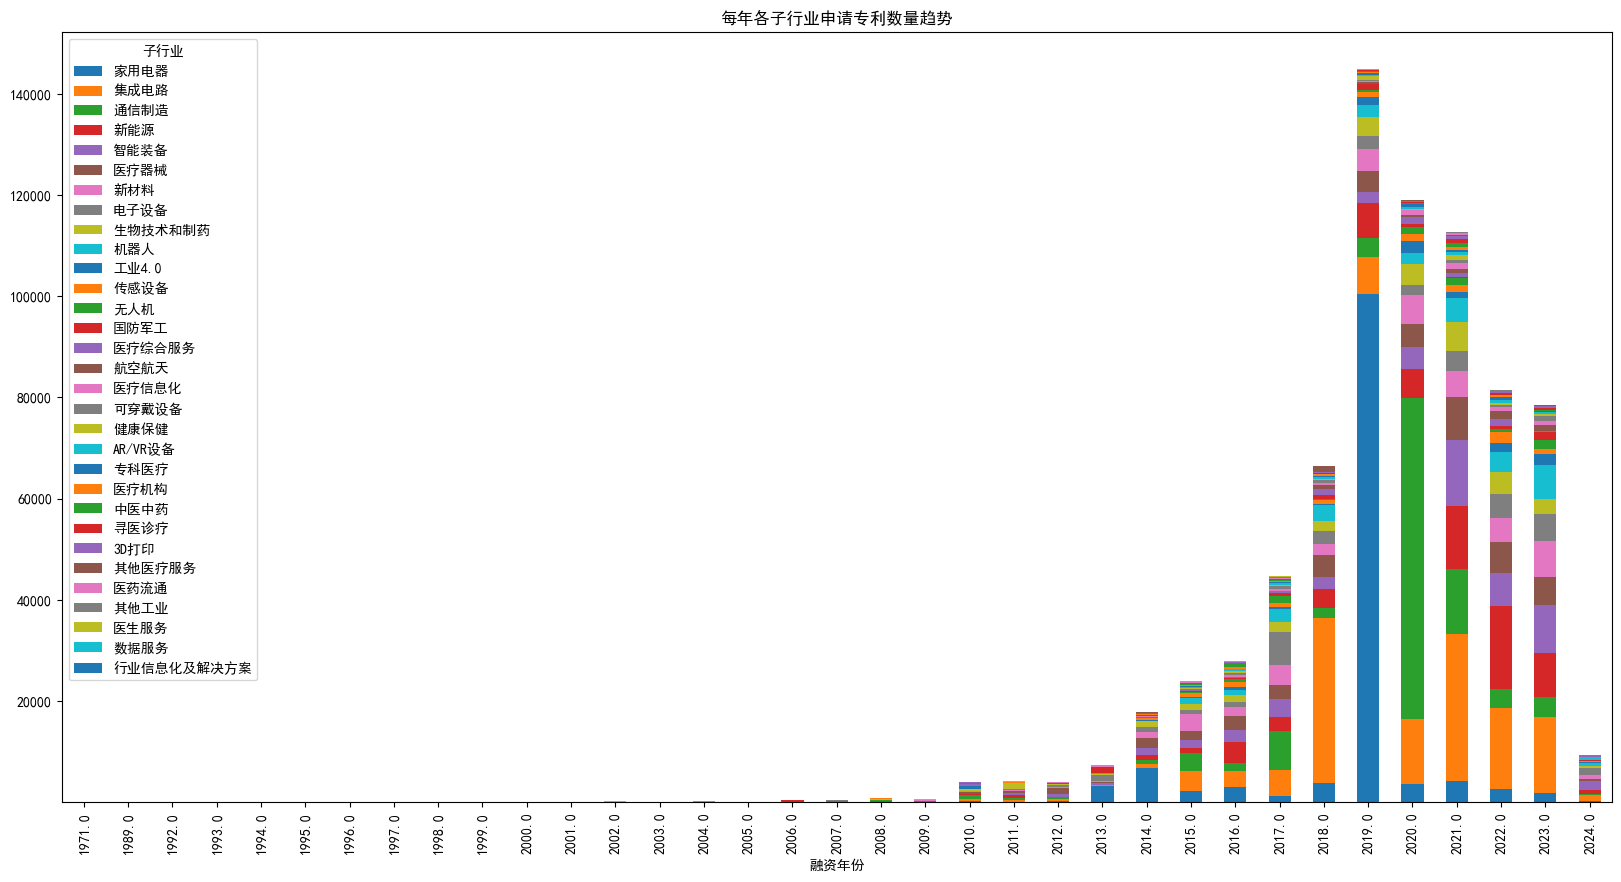

In [25]:
d8=df.pivot_table(columns='子行业',index='融资年份',values='Application_num',aggfunc='sum')
d8=d8[d8.sum().sort_values(ascending=False).index]

colors = plt.cm.tab10.colors[:len(d8.columns)]
d8.plot.bar(stacked=True,figsize=(20,10))

plt.title('每年各子行业申请专利数量趋势')
plt.legend(title='子行业')

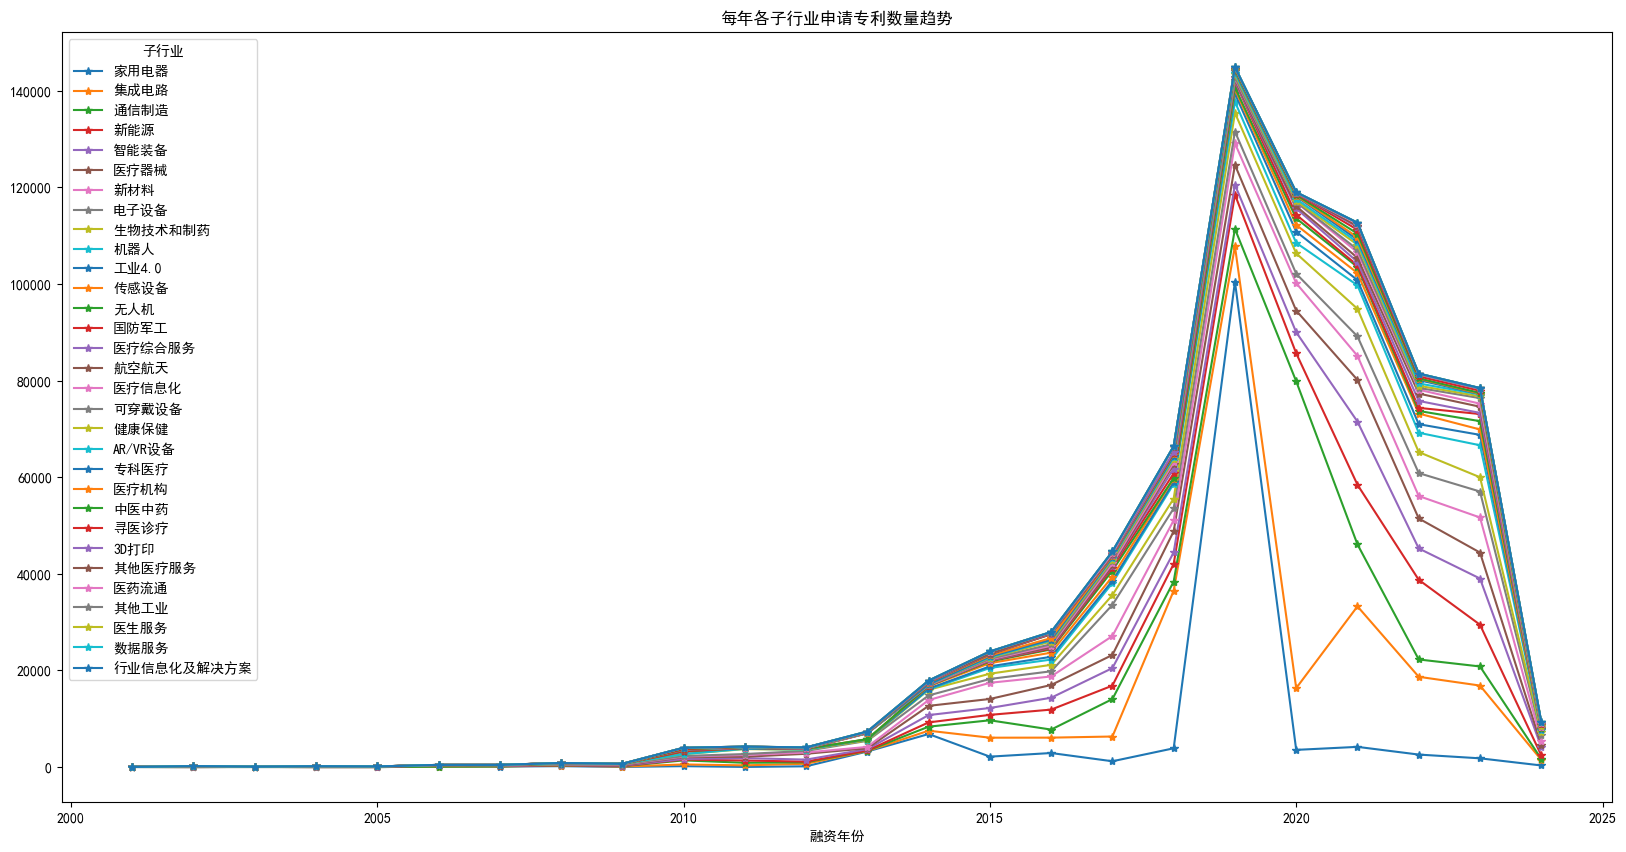

In [40]:
d8[d8.index>2000].plot(stacked=True,figsize=(20,10),marker='*')
plt.title('每年各子行业申请专利数量趋势')
plt.legend(title='子行业')

<Axes: ylabel='子行业'>

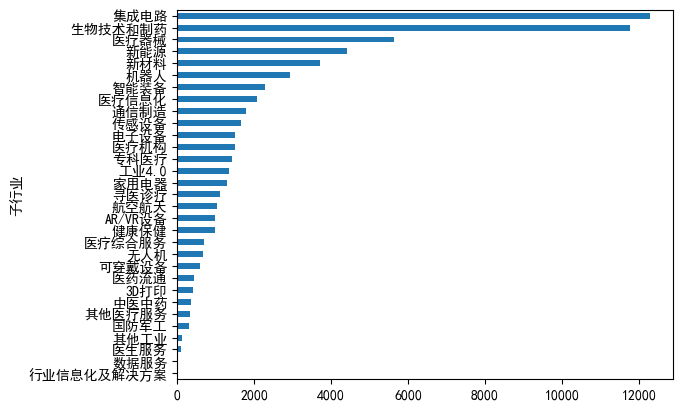

In [26]:
df.groupby('子行业')['VC-num'].sum().sort_values().plot.barh()

<Axes: title={'center': '各子行业的参与投资机构数量'}, ylabel='子行业'>

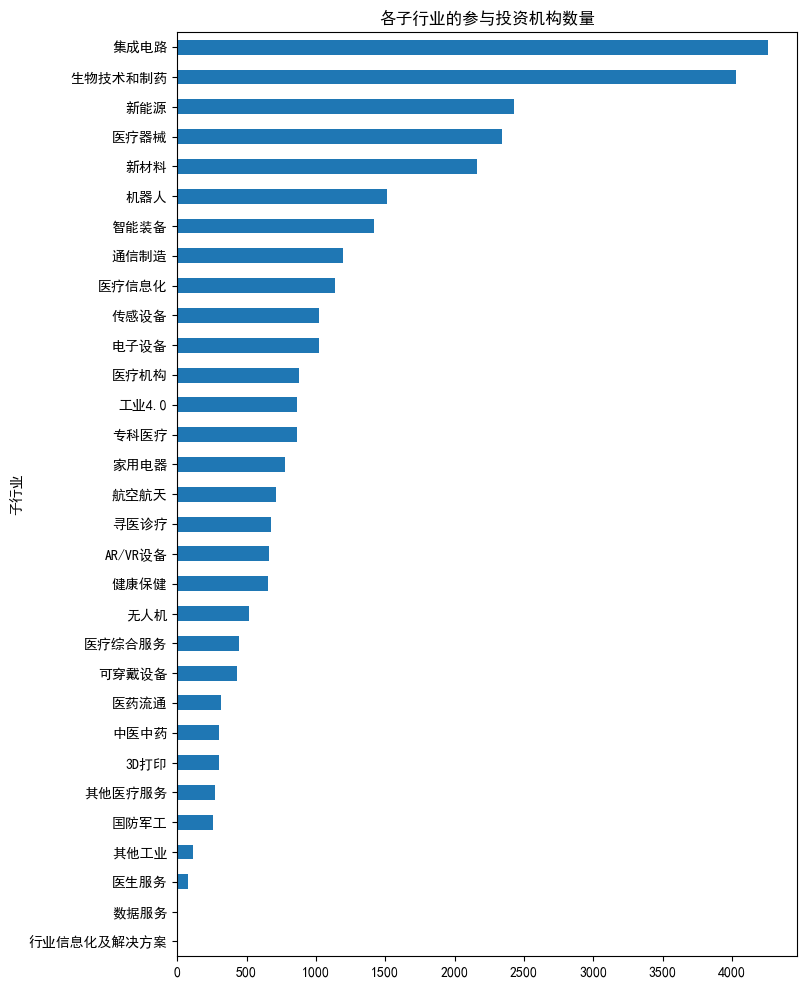

In [27]:
df.groupby('子行业').apply(lambda x:x['投资机构'].str.split('|').explode().str.strip().replace('', np.nan).dropna().nunique()).sort_values().plot.barh(title='各子行业的参与投资机构数量',figsize=(8,12))

In [28]:
fig=plt.figure(figsize=(30,10),dpi=500)
fig.add_subplot(1,3,1)
sns.boxplot(df,y='子行业', x='vc_rep').set(title='投资机构声誉')
fig.add_subplot(1,3,2)
sns.boxplot(df,y='子行业', x='vc_mktexp').set(title='投资机构市场经验')
plt.gca().set_yticks([])#set_yticklabels
fig.add_subplot(1,3,3)
sns.boxplot(df,y='子行业', x='VC行业经验').set(title='投资机构行业经验')
plt.gca().set_yticks([])

[]

In [6]:
tf_df=pd.read_csv('E:\Documents\Jupyter\data\\patent_word_tf_df_先进制造_医疗健康.csv')

Text(0.5, 1.0, 'idf')

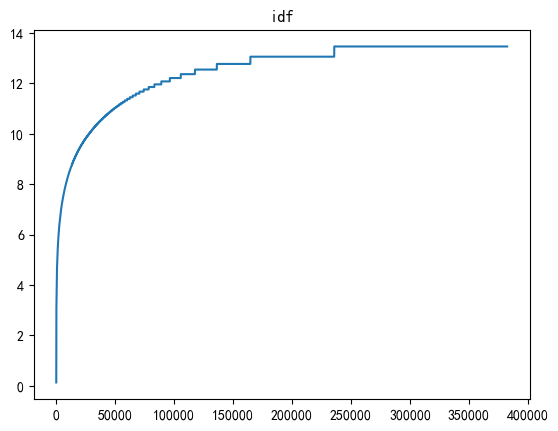

In [21]:
plt.plot(np.log(1405930/(tf_df['df']+1)))#1405930
plt.title('idf')

Text(0, 0.5, 'df')

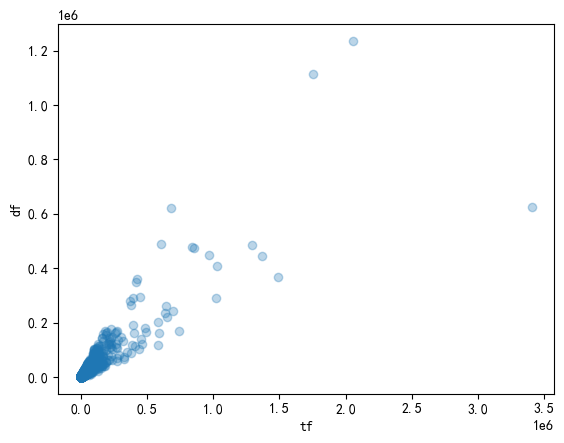

In [24]:
plt.scatter(tf_df['tf'],tf_df['df'],alpha=0.3)
plt.xlabel('tf')
plt.ylabel('df')